SyntaxError: invalid syntax (<ipython-input-3-f8f5638987db>, line 1)

t =  0.16000000000000003
t =  0.32000000000000006
t =  0.4800000000000001
t =  0.6400000000000001
t =  0.8000000000000002
t =  0.9600000000000002
t =  1.12
t =  1.2800000000000002
t =  1.4400000000000004
t =  1.6000000000000005
t =  1.7600000000000007
t =  1.9200000000000008
t =  2.080000000000001
t =  2.240000000000001
t =  2.4000000000000012
t =  2.5600000000000014
t =  2.7200000000000015
t =  2.8800000000000017
t =  3.040000000000002
t =  3.200000000000002
t =  3.360000000000002
t =  3.5200000000000022
t =  3.6800000000000024
t =  3.8400000000000025
t =  4.000000000000003
t =  4.160000000000003
t =  4.320000000000003
t =  4.480000000000003
t =  4.640000000000003
t =  4.800000000000003
t =  4.9600000000000035
t =  5.120000000000004
t =  5.280000000000004
t =  5.440000000000004
t =  5.600000000000004
t =  5.760000000000004
t =  5.920000000000004
t =  6.0800000000000045
t =  6.240000000000005
t =  6.400000000000005
t =  6.560000000000005
t =  6.720000000000005
t =  6.880000000000005
t 

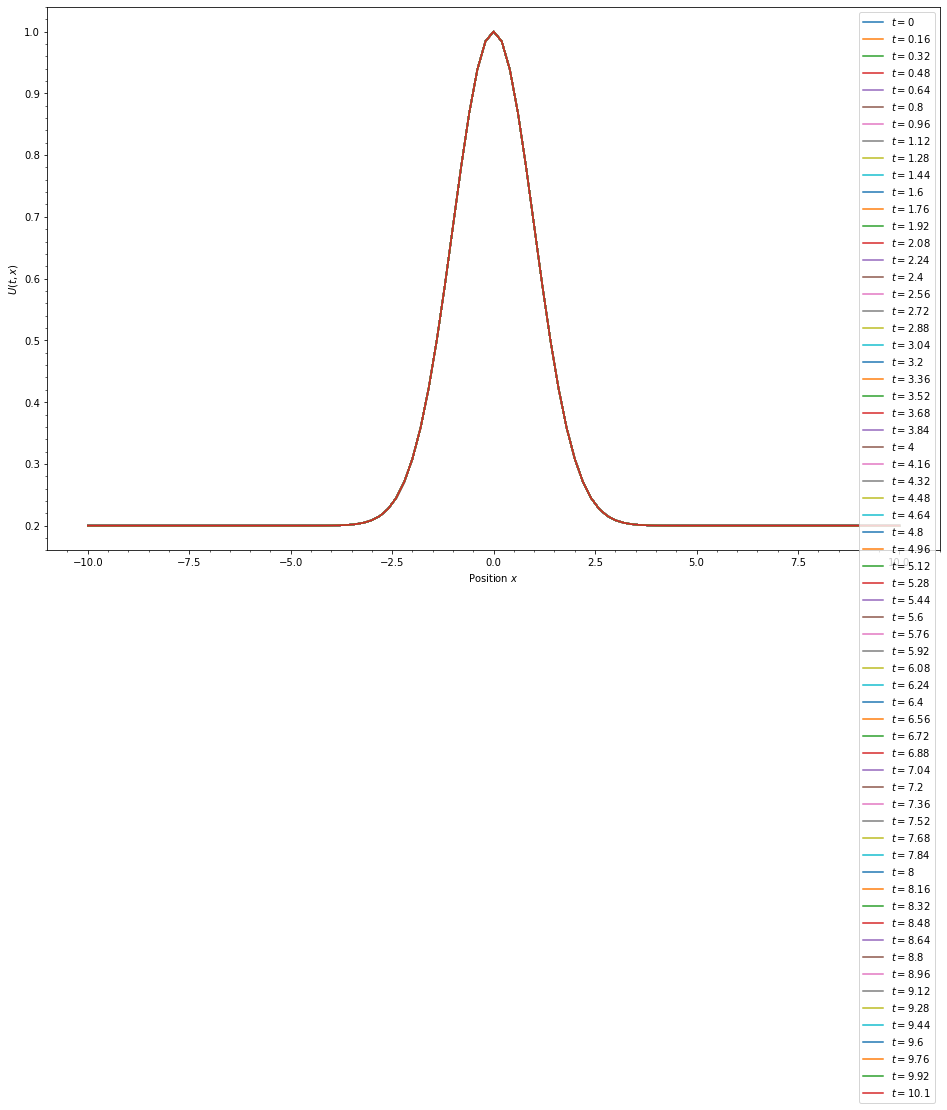

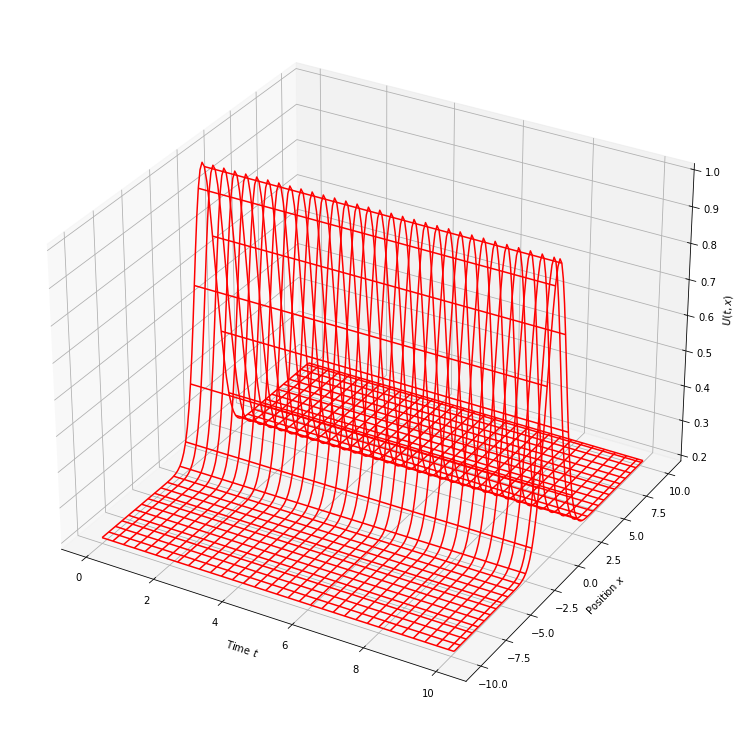

In [39]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    if xmax > 0:
        for ix in range(100, Nx - 1):
           U[ix]=Uold[ix]-xmax*dt*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.        
    else:
        for ix in range(100, Nx - 1):
           U[ix]=Uold[ix]-xmax*dt*(Uold[ix+1]-Uold[ix])/dx # Task: implement upwind method here.
            
    t += dt
    
    # Save the data after every dtout.
    if t <= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout
        
    if xmin < 0:
        for ix in range(100, Nx - 1):
            U[ix]=Uold[ix]-xmin*dt*(Uold[ix]-Uold[ix-1])/dx# Task: implement upwind method here.
    else:
        for ix in range(100, Nx - 1):
            U[ix]=Uold[ix]-xmin*dt*(Uold[ix+1]-Uold[ix])/dx # Task: implement upwind method here.
    
    
     # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout



ax.legend()

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()


NameError: name 'd' is not defined